In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
       

In [2]:
crime1=pd.read_csv(r'E:/Abhishek-Singh/Interview_Prep_Projects/Crime_Analysis/data/Crimes_2001_to_2004.csv',error_bad_lines=False)
crime2=pd.read_csv(r'E:/Abhishek-Singh/Interview_Prep_Projects/Crime_Analysis/data/Crimes_2005_to_2007.csv',error_bad_lines=False)
crime3=pd.read_csv(r'E:/Abhishek-Singh/Interview_Prep_Projects/Crime_Analysis/data/Crimes_2008_to_2011.csv',error_bad_lines=False)
crime4=pd.read_csv(r'E:/Abhishek-Singh/Interview_Prep_Projects/Crime_Analysis/data/Crimes_2012_to_2017.csv',error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
c:\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


Note: Using error_bad_lines=False while reading the data because while reading file with pandas.read_csv() pandas was tokenising deliminitaors (',') and creating extra columns using error_bad_lines=False skips those lines, and since its just a few lines its okay to skip them as they do not skew the results

In [3]:
crimes= pd.concat([crime1,crime2,crime3,crime4])

In [4]:
crimes.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [5]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7941282 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [6]:
crimes.shape

(7941282, 23)

Removing the variables not needed for the analysis


In [7]:
crimes.drop(['Unnamed: 0','Case Number', 'IUCR', 'Ward', 'Community Area', 'Location', 'Updated On'], inplace=True,axis=1)

#axis=1, bcz we are removing columns, axis=0 would be used if rows were removed.
#inplace=True is used when we want the changes to take effect right away, otherwise default inplace=False would have been ineffect which means changes made would have to be assigned to a new variable

As we can tell from the first few rows, we have several columns that will help us answer our questions. We will use the 'Date' column to explore temporal patterns, 'Primary Type' and 'Location Description' to investigate their relationship with time (month of the year, time of the day, hour of the day, .. etc). Later we will use geolocation to map out safe spots (and times) in the city

In [8]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7941282 entries, 0 to 1456713
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Block                 object 
 3   Primary Type          object 
 4   Description           object 
 5   Location Description  object 
 6   Arrest                bool   
 7   Domestic              bool   
 8   Beat                  int64  
 9   District              float64
 10  FBI Code              object 
 11  X Coordinate          float64
 12  Y Coordinate          object 
 13  Year                  float64
 14  Latitude              object 
 15  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(8)
memory usage: 924.0+ MB


As we can tell from the first few rows, we have several columns that will help us answer our questions. We will use the 'Date' column to explore temporal patterns, 'Primary Type' and 'Location Description' to investigate their relationship with time (month of the year, time of the day, hour of the day, .. etc). Later we will use geolocation to map out safe spots (and times) in the city

In [9]:
#converting data and time to the datetime format that pandas will be able to work with bcz right not date is considered as an object

crimes.Date=pd.to_datetime(crimes.Date,format='%m/%d/%Y %I:%M:%S %p')

#indexing the entire data with timestamp
crimes.index=pd.DatetimeIndex(crimes.Date)


In [10]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7941282 entries, 2004-01-01 00:01:00 to 2016-05-03 23:38:00
Data columns (total 16 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Block                 object        
 3   Primary Type          object        
 4   Description           object        
 5   Location Description  object        
 6   Arrest                bool          
 7   Domestic              bool          
 8   Beat                  int64         
 9   District              float64       
 10  FBI Code              object        
 11  X Coordinate          float64       
 12  Y Coordinate          object        
 13  Year                  float64       
 14  Latitude              object        
 15  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 924.0+ MB


In [11]:
crimes.shape


(7941282, 16)

In [12]:
#removing the duplicate values

print('Dataset Shape before drop_duplicate : ', crimes.shape)

crimes.drop_duplicates(subset=['ID'], inplace=True)

print('Dataser after removing dublicate values:',crimes.shape)

Dataset Shape before drop_duplicate :  (7941282, 16)
Dataser after removing dublicate values: (6170812, 16)


In [13]:
#checking for missing values

crimes.isnull().sum()

ID                          0
Date                        0
Block                       0
Primary Type                0
Description                 0
Location Description     1968
Arrest                      0
Domestic                    0
Beat                        0
District                   49
FBI Code                    0
X Coordinate            84223
Y Coordinate            84223
Year                        0
Latitude                84223
Longitude               84223
dtype: int64

In [14]:
# Using mean technique to replace missing values 

# crimes['Location Description'].mean()


In [15]:
# crimes['X Coordinate'].mean()

In [16]:
# crimes['Y Coordinate'].mean()

In [17]:
# crimes['Latitude'].mean()
# crimes['Longitude'].mean()

In [18]:
# crimes.isnull().sum()

### Exploration and Visualization

At this point, I think we are done with all the preprocessing and cleaning. Now it is time to see what we got. In this section, I will make use of many of pandas functionality like resampling by a time frame and pivot_table (a function that somehow changes the way I think!).

Let us begin by some generic queries, like how many records we have for each month ?

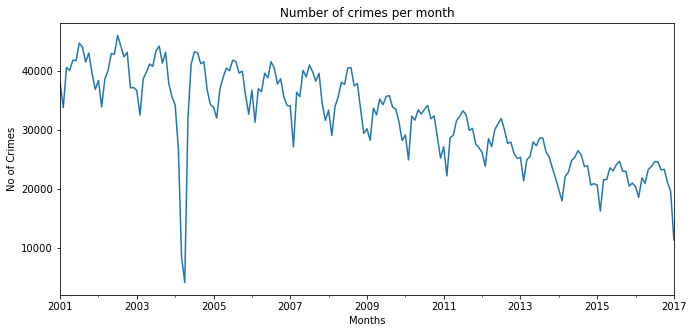

In [34]:
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot() #'M' stands for month end frequency #Resampling is necessary when you’re given a data set recorded in some time interval 
plt.title('Number of crimes per month')
plt.xlabel('Months')
plt.ylabel('No of Crimes')
plt.show()

This chart shows a clear "periodic" pattern in the crimes over many years. I guess this very periodic pattern is an essential part of why crime a very predictable activity!.

Before we take a deeper look into how other features could mediate such temporal consistency, I first want to answer our first question: How crime has changed over the years? is it decreasing? Let's have a look at what we have (from 2012 to 2016 for now).

In a previous chart, we already looked at the number of monthly crime records. Although it may not be very clear from the previous chart how crime have changed over the years, it still gives somehow similar numbers between 2005 and 2016. Here, we will take a finer scale to get the visualization right. I decided to look at the rolling sum of crimes of the past year. The idea is, for each day, we calculate the sum of crimes of the past year. If this rolling sum is decreasing, then we know for sure that crime rates have been decreasing during that year. On the other hand, if the rolling sum stays the same during a given year, then we can conclude that crime rates stayed the same.

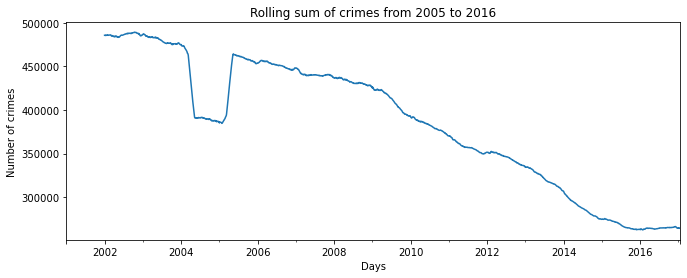

In [51]:
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot() #crimes per day 
plt.title('Rolling sum of crimes from 2005 to 2016')
plt.xlabel('Days')
plt.ylabel('Number of crimes')
plt.show()




We see the line decreasing from 2006 up to some point around 2016 after which it stays around the same number of crimes.

But..

could this figure be too good to be true?

Let's separate crimes by type and see

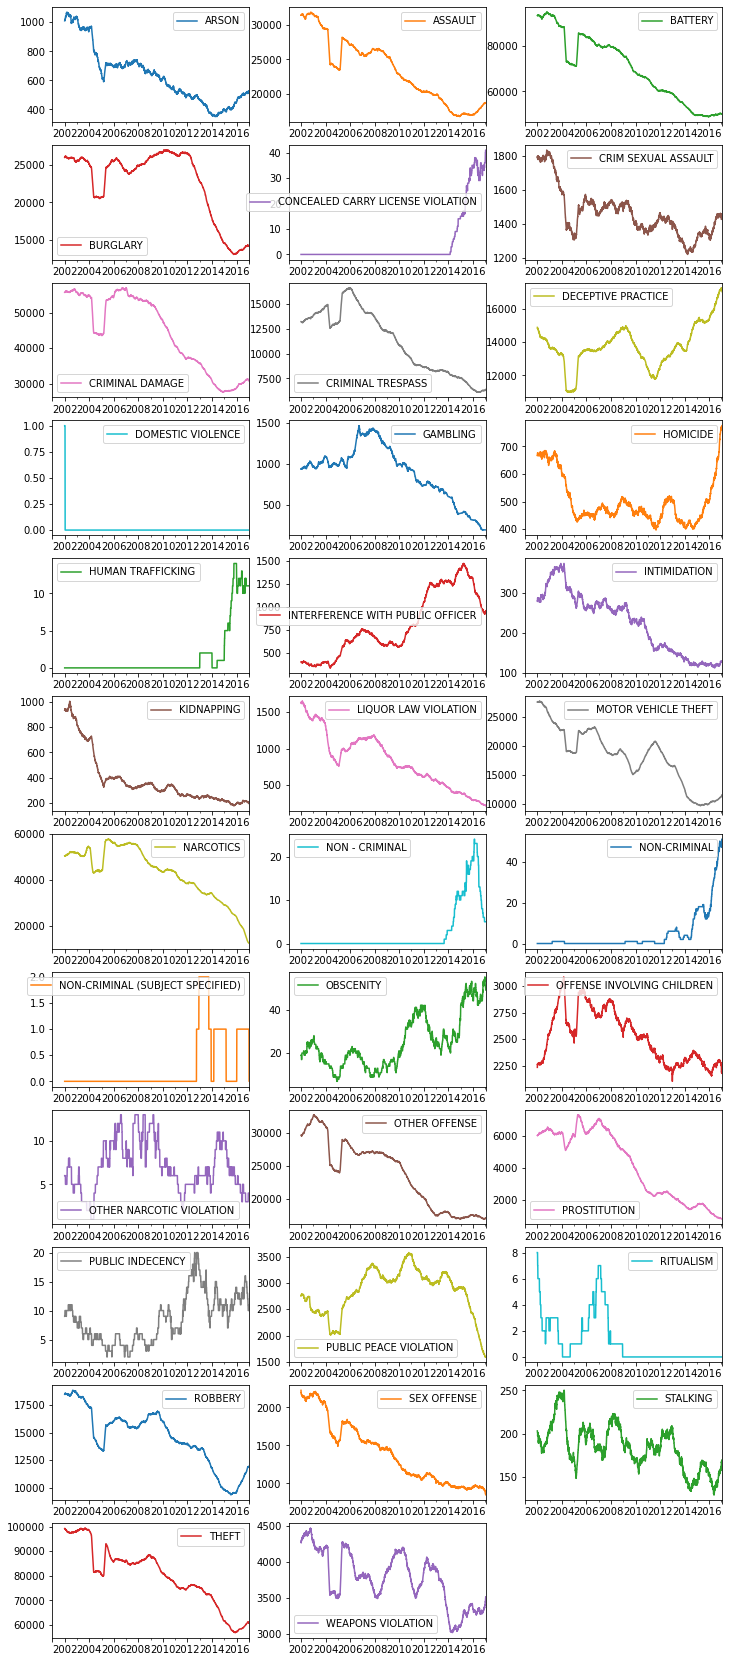

In [53]:
crimes_by_type=crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)  #.pivot_table summaries the data and creates a spreadsheet-style pivot table as a DataFrame.
crimes_by_type.index=pd.DatetimeIndex(crimes_by_type.index)
plot = crimes_by_type.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

Some crime types are actually increasing all along like homicide and deceptive practice. Other types started to increase slightly before 2016 like theft, robbery and stalking (which may be the reason behind the trend we saw earlier).

### A general view of crime records by time, type and location

Not all crimes are the same. Some crimes types are more likely to occur than other types depending on the place and time. In this section, we will see how crimes differ between different places at different times.

The first thing we are going to look at is if there is a difference in the number of crimes during specific days of the week. Are there more crimes during weekdays or weekend?

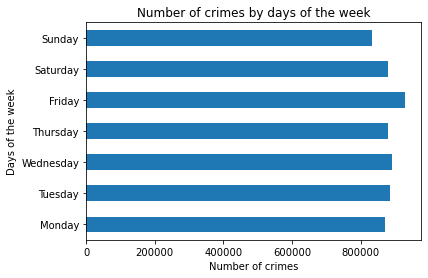

In [69]:
days=['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.title('Number of crimes by days of the week')

plt.show()



I don't really see drastic crime different between days of the week. Maybe Friday has higher number of crime than other days, but this is still based on the counts and we are not really sure of which crime the above plot is talking about.

Now Let's look at crimes per month and see if certain months show more crimes than others.

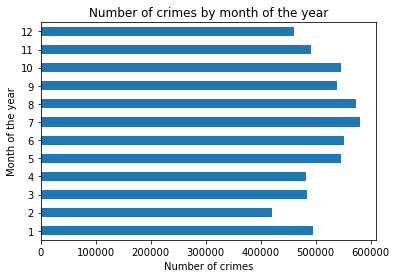

In [73]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Month of the year')
plt.title('Number of crimes by month of the year')
plt.show()


Crimes rates seem to peak at summer months!

Let's have a look at the distribution of crime by their types, which crimes are most common among the top 20 most frequent crime types ?

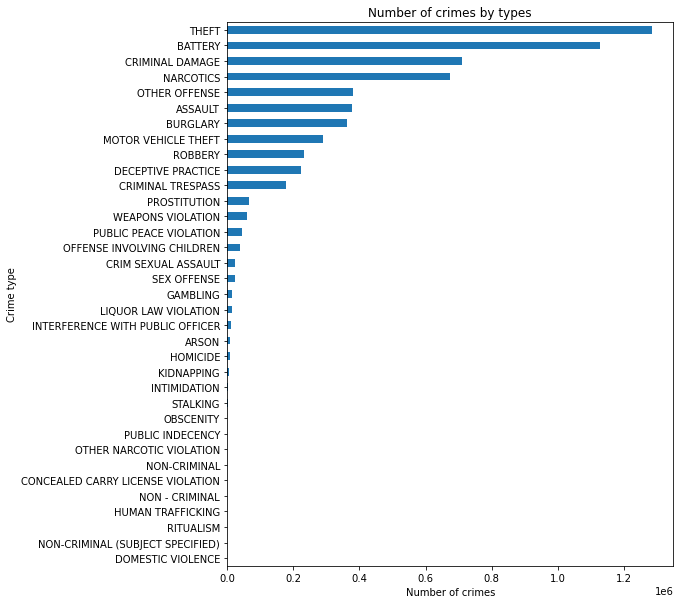

In [75]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by types')
plt.xlabel('Number of crimes')
plt.ylabel('Crime type')
plt.show()

Let's look at the crime by location

<AxesSubplot:xlabel='count', ylabel='Location Description'>

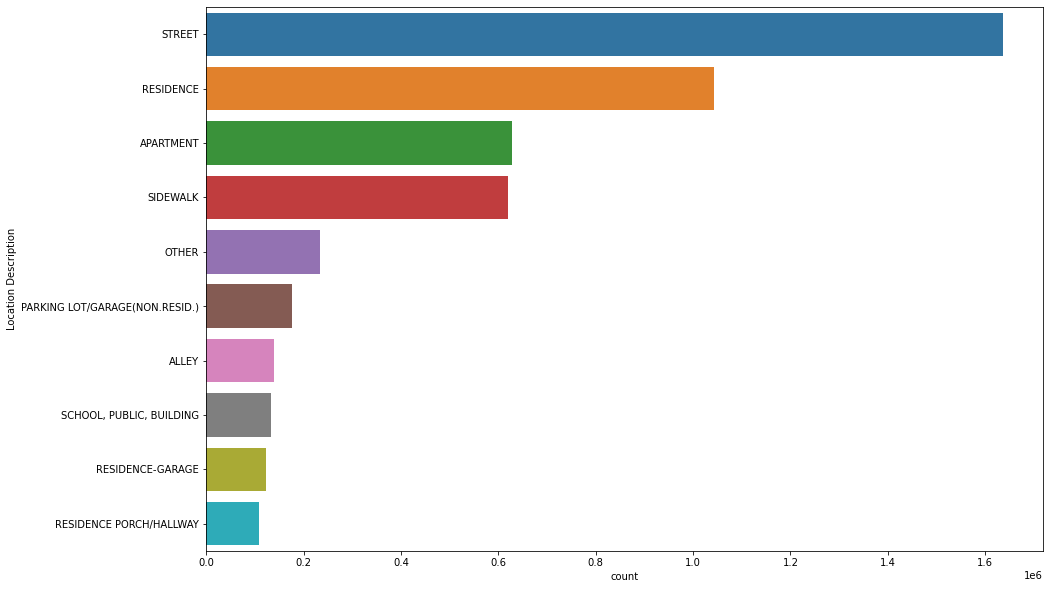

In [82]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = crimes, order = crimes['Location Description'].value_counts().iloc[:10].index)

In [83]:
#Saving the crimes dataset

crimes.to_csv(r'E:\Abhishek-Singh\Interview_Prep_Projects\Crime_Analysis\data\crimes.csv')

Conclusion:

Q-Has there been a decrease in crimes over the years? 
A-Yes and No is the answer that question.Though, there has been a decrease in the overall number of crimes throughout the duration some crimes seemed to have risen over the period of time.Eg:homicide and deceptive practice.

Q-Which was the bloodiest year in the decade? 
A-Year 2011 was the bloodiest year in the decade as it shows the highest number of crime comitted.

Q-Are some types of crimes more likely to happen in specific locations or specific time of the day or specific day of the week than other types of crimes? 
A-As we can see from the above graphs there is a correlaion between crime,time andplace.Some crimes happen more at a particular place, time and location when compared to others. Eg:Theft, which shows as a high corelation with street and is registered to happen more on Friday.

Suggestions to control crime - hotspots policing is an effective crime prevention strategy. In a randomized controlled trial it can be aimed at reducing crime and disorder.